In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../data/city_data.csv"
ride_data_to_load = "../data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df, how="left", on="city")


# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Separate combined data by city type
suburban_data_df = combined_data_df.loc[combined_data_df["type"] == "Suburban", :]
urban_data_df = combined_data_df.loc[combined_data_df["type"] == "Urban", :]
rural_data_df = combined_data_df.loc[combined_data_df["type"] == "Rural", :]


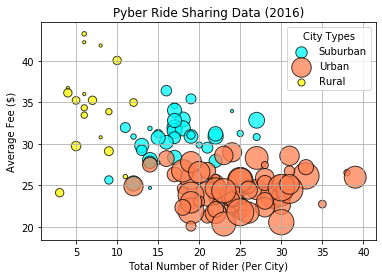

In [5]:
# Obtain the x and y coordinates for each of the three city types
suburban_driver_count = suburban_data_df.groupby("city")["driver_count"].mean()
urban_driver_count = urban_data_df.groupby("city")["driver_count"].mean()
rural_driver_count = rural_data_df.groupby("city")["driver_count"].mean()


suburban_x = suburban_data_df.groupby("city")["ride_id"].count()
suburban_y = suburban_data_df.groupby("city")["fare"].mean()

urban_x = urban_data_df.groupby("city")["ride_id"].count()
urban_y = urban_data_df.groupby("city")["fare"].mean()

rural_x = rural_data_df.groupby("city")["ride_id"].count()
rural_y = rural_data_df.groupby("city")["fare"].mean()


# Build the scatter plots for each city types
plt.scatter(suburban_x, suburban_y, color="aqua", edgecolor="black" , 
            s=10*suburban_driver_count, alpha=0.75, label="Suburban")
plt.scatter(urban_x, urban_y, color="coral", edgecolor="black", 
            s=10*urban_driver_count, alpha=0.75, label="Urban")
plt.scatter(rural_x, rural_y, color="yellow", edgecolor="black", 
            s=10*rural_driver_count, alpha=0.75, label="Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rider (Per City)")
plt.ylabel("Average Fee ($)")


# Create a legend
plt.legend(loc="upper right", title="City Types")

# Incorporate a text label regarding circle size

# Save Figure

# Show plot
plt.grid()
plt.show()


In [38]:
# Show plot
plt.show()

## Total Fares by City Type

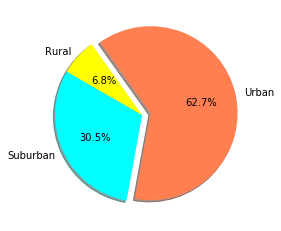

In [31]:
# Calculate Type Percents
total_fare = combined_data_df["fare"].sum()
suburban_fare_pct = suburban_data_df["fare"].sum() / total_fare *100
urban_fare_pct = urban_data_df["fare"].sum() / total_fare *100
rural_fare_pct = rural_data_df["fare"].sum() / total_fare *100

fare_pct_data = [suburban_fare_pct, urban_fare_pct, rural_fare_pct]

# Build Pie Chart
pct_labels = ["Suburban", "Urban", "Rural"]
pct_colors = ["cyan", "coral", "yellow"]
expl = (0, 0.1, 0)

plt.pie(fare_pct_data, explode=expl, labels=pct_labels, colors= pct_colors, 
        autopct="%.1f%%", shadow=True, startangle=150)

# Save Figure

# Show Figure
plt.show()


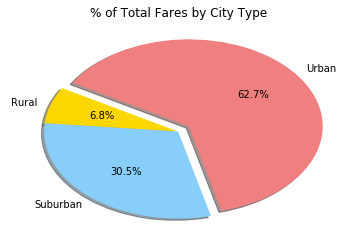

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

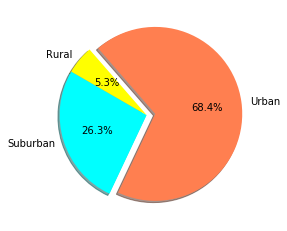

In [37]:
# Calculate Ride Percents
total_ride_count = combined_data_df["ride_id"].count()
suburban_ride_pct = suburban_data_df["ride_id"].count() / total_ride_count *100
urban_ride_pct = urban_data_df["ride_id"].count() / total_ride_count *100
rural_ride_pct = rural_data_df["ride_id"].count() / total_ride_count *100

ride_pct_data = [suburban_ride_pct, urban_ride_pct, rural_ride_pct]

# Build Pie Chart
plt.pie(ride_pct_data, explode=expl, labels=pct_labels, colors=pct_colors,
       autopct="%.1f%%", shadow=True, startangle=150)

# Save Figure

# Show Figure
plt.show()


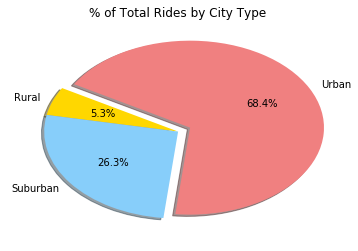

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

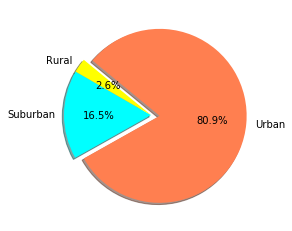

In [35]:
# Calculate Driver Percents
total_driver_count = combined_data_df.groupby(["type", "city"])["driver_count"].mean().sum()

suburban_driver_pct = suburban_data_df.groupby("city")["driver_count"].mean().sum() / total_driver_count *100
urban_driver_pct = urban_data_df.groupby("city")["driver_count"].mean().sum() / total_driver_count *100
rural_driver_pct = rural_data_df.groupby("city")["driver_count"].mean().sum() / total_driver_count *100

driver_pct = [suburban_driver_pct, urban_driver_pct, rural_driver_pct]


# Build Pie Charts
plt.pie(driver_pct, explode=expl, colors=pct_colors, labels=pct_labels,
       autopct="%.1f%%", shadow=True, startangle=150)


# Save Figure

# Show Figure
plt.show()


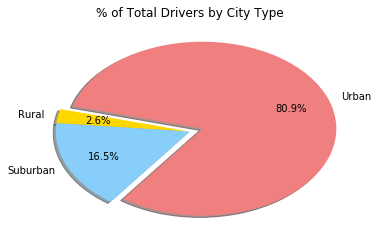

In [6]:
# Show Figure
plt.show()